## Промежуточный проект
### Вариант 2 (e-learning)

In [1]:
# Импорт необходимых библиотек

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import where, select

In [2]:
# Настройка для максимальной отображаемой ширины колонок

pd.options.display.max_colwidth = 100

### Подготовка

---


Для анализа нам предоставлены 4 таблицы, в которых содержится информация о студентах (id студента, дата регистрации, сдачи экзамена, успеваемость и т.д.) и тестах (id теста, дата его проведения, семестр, предмет и т.д.). 

Давайте подробнее взглянем на них


In [3]:
assessments = pd.read_csv('data/assessments.csv')
courses = pd.read_csv('data/courses.csv')
studentAssessment = pd.read_csv('data/studentAssessment.csv')
studentRegistration = pd.read_csv('data/studentRegistration.csv')

**assessments.csv** — этот файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).

- *code_module* — идентификационный код предмета.

- *code_presentation* — семестр (Идентификационный код).

- *id_assessment* — тест (Идентификационный номер ассессмента).

- *assessment_type* — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).

- *date* — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).

- *weight* — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

In [4]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [5]:
assessments.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 41.6 KB


In [6]:
assessments.duplicated().sum()

0

In [7]:
assessments.loc[assessments['date'] != assessments['date']]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


По первой таблице видим, что дубликатов в ней нет, но в разделе информации о таблице можно заметить Null значения в колонке дат. Проверив, получаем, что даты отсутствуют только для некоторых экзаменов. Возможно, это говорит о том, что у экзамена отсутствует дедлайн.

**courses.csv** — файл содержит список предметов по семестрам.

- *code_module* — предмет (идентификационный код).

- *code_presentation* — семестр (идентификационный код).

- *module_presentation_length* — продолжительность семестра в днях.

In [8]:
# Таблица небольшая, соответственно можем показать все её строки

courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [9]:
courses.sort_values(['code_presentation', 'module_presentation_length'])

,code_module,code_presentation,module_presentation_length
4,BBB,2013B,240
10,DDD,2013B,240
17,FFF,2013B,240
8,DDD,2013J,261
19,GGG,2013J,261
0,AAA,2013J,268
2,BBB,2013J,268
12,EEE,2013J,268
15,FFF,2013J,268
5,BBB,2014B,234


In [10]:
courses.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.9 KB


In [11]:
courses.duplicated().sum()

0

Вторая таблица - вторая странность. В рамках одного семестра есть предметы (меньшинство), у которых продолжительность семестра меньше остальных на неделю (7 дней). С одной стороны семестр является стандартизированной величиной и не должен меняться от предмета к предмету, с другой же разница всегда постоянная, что может объясняться структурой курса. 

Дублей в таблице так же нет.

**studentAssessment.csv** — этот файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.

- *id_assessment* — тест (идентификационный номер).

- *id_student* — идентификационный номер студента.

- *date_submitted* — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

- *is_banked* — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).

- *score* — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

In [12]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [13]:
studentAssessment.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [14]:
studentAssessment.loc[studentAssessment['score'] != studentAssessment['score']]['id_assessment'].count()

173

In [15]:
studentAssessment.duplicated().sum()

0

Дублей нет. Для некоторых тестов нет записей об оценке за них.

**studentRegistration.csv** — этот файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.

- *code_module* — предмет (идентификационный код).

- *code_presentation* — семестр (идентификационный код)

- *id_student* — идентификационный номер студента.

- *date_registration* — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).

- *date_unregistration* — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

In [16]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [17]:
studentRegistration.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.5 MB


In [18]:
studentRegistration.duplicated().sum()

0

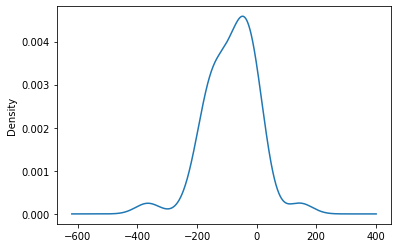

In [19]:
studentRegistration.loc[studentRegistration['date_registration'] != studentRegistration['date_registration']]['date_unregistration'].plot(kind='kde');

Дублей опять же нет, имеются пустые ячейки для полей `date_registration` и `date_unregistration`. Если с `date_unregistration` всё логично, ведь и в описании данного поля написано, что для окончивших курс студентов оно остается пустым. Другое дело с `date_registration` - не очень понятно, по какой причине нет записей в этом столбце. Как видно из графиков,  бóльшая часть отмен регистрации на курс для `Null` значений поля `date_registration` находится немного ниже, но есть значения как сильно больше нуля, так и сильно меньше. Поэтому из графика не получается сформулировать какую-то закономерную причину отсутствия значений.

### Задание 1

---

Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене).

Сначала определимся, что мы будем понимать под словом "курс" в рамках данного проекта, а именно, следуя данным в таблице `courses`, связку предмета и семестра. То есть если предмет присутствует в n числе семестров, то это будет n число курсов. 

Далее требуется найти всех студентов, которые получили за экзамен >= 40 баллов только один раз. 

In [20]:
assessments.query('assessment_type == "Exam"')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [21]:
assessments.query('assessment_type == "Exam" and code_module == "CCC"')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


Как можно заметить, для предмета `CCC` в рамках одного семестра имеется по 2 экзамена. Ломает ли это нашу логику об определении курса? Разберём этот момент подробнее

In [22]:
# Соединим таблицу с информацией о тестах с таблицей с информацией о их сдаче

full_studentAssessment = studentAssessment.merge(assessments, on='id_assessment')

In [23]:
# Так выглядит итоговая таблица

full_studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


In [24]:
# Посмотрим, по каким экзаменам предмета ССС у нас есть информация 

full_studentAssessment.loc[(full_studentAssessment['assessment_type'] == 'Exam') & (full_studentAssessment['code_module'] == 'CCC'), 'id_assessment'].value_counts()

24299    1168
24290     747
Name: id_assessment, dtype: int64

In [25]:
# id теста указывает на то, когда он был добавлен (относительно остальных)

assessments.sort_values('id_assessment').tail(10)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
204,GGG,2014J,37437,TMA,173.0,0.0
196,GGG,2014J,37438,CMA,229.0,0.0
197,GGG,2014J,37439,CMA,229.0,0.0
198,GGG,2014J,37440,CMA,229.0,0.0
199,GGG,2014J,37441,CMA,229.0,0.0
200,GGG,2014J,37442,CMA,229.0,0.0
201,GGG,2014J,37443,CMA,229.0,0.0
205,GGG,2014J,37444,Exam,229.0,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


Судя по нашим данным студенты сдавали по одному экзамену предмета `CCC` за семестр, причем id этих экзаменов более "старые": 24299 и 24290. Исходя из этого мы можем сделать вывод о том, что экзамены с id 40087 и 40088 предмета `CCC` скорее всего являются глобальным обновлением этого экзамена (возможно, полностью была пересмотрена структура экзамена и его задания). На это указывает то, что они появились после создания тестов по всем предметам. 

По итогу наша логика остается рабочей: для каждой связки предмет + семестр у нас в соответствие идет только один экзамен. Для предмета `CCC` до какого-то времени были экзамены с id 24299 и 24290, а после предполагаемого обновления стали 40087, 40088 (одновременно эти экзамены не существовали). 

In [26]:
# Отбираем строки с информацией об успешной сдаче экзаменов, группируем по студентам, 
# считаем кол-во сданных экзаменов студентом и отбираем только тех, кто сдал один экзамен

len(full_studentAssessment.query('assessment_type == "Exam" and score >= 40') \
    .groupby('id_student') \
    .agg({'assessment_type': 'count'}) \
    .query('assessment_type == 1') 
)

3802

С другой стороны можно было бы воспользоваться таблицей `studentRegistration`, где указано, что столбец `date_unregistration` для студентов, окончивших курс, остаётся пустым (`NaN`). Но докажем, что данный вариант не может быть использован в нашем случае.

In [27]:
# Выберем студента, который сдал 2 экзамена с неудовлетворительым результатом

full_studentAssessment.query('assessment_type == "Exam" & id_student == 558914')

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0
70122,25340,558914,230,0,36.0,DDD,2013B,Exam,240.0,100.0


In [28]:
# Посмотрим, что записано в таблице studentRegistration для этого студента

studentRegistration.query('id_student == 558914')

,code_module,code_presentation,id_student,date_registration,date_unregistration
9419,CCC,2014B,558914,-74.0,NaN
14140,DDD,2013B,558914,-24.0,NaN


Отсюда видно, что оконание курса не является достаточным условием успешной сдачи. Окончить курс можно и набрав меньше 40 баллов за экзамены

#### Ответ: 3802 студента сдали успешно только один курс

### Задание 2

---

Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*.

*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

*Прим.* Так как мы определили понятие курса для нашего проекта, что означает соответствие одному курсу одного экзамена, то такая формулировка задания является бессмысленной с точки зрения аналитики. Корректнее будет найти такие экзамены в рамках предметов.

In [29]:
# Проверим таблицу full_studentAssessment на полноту данных

full_studentAssessment.query('assessment_type == "Exam"')['id_assessment'].nunique()

6

In [30]:
# Как видим, разница между полным списком экзаменов и списком экзаменов, которые хотя бы раз проходили, составляет 18

assessments.query('assessment_type == "Exam"')['id_assessment'].nunique()

24

In [31]:
# Создадим столбец с флагом сдачи теста

full_studentAssessment['is_passed'] = where(full_studentAssessment['score'] >= 40, 1, 0)

С этим флагом есть один нюанс. При первом осмотре таблиц мы заметили, что не для всех сдач указана оценка (стоит `NaN`). Посмотрим, что это за тесты.

In [32]:
full_studentAssessment.loc[studentAssessment['score'] != studentAssessment['score']]['assessment_type'].value_counts()

TMA    173
Name: assessment_type, dtype: int64

С оценками за экзамены всё в порядке, так что можем не беспокоиться на этот счет

In [33]:
exam_completion = full_studentAssessment \
    .query('assessment_type == "Exam"') \
    .groupby(['code_module', 'id_assessment'], as_index=False) \
    .agg(passes_count=('is_passed', 'count'), successful_passes=('is_passed', 'sum'))


In [34]:
exam_completion['completion'] = round(exam_completion['successful_passes'] / exam_completion['passes_count'], 3)
exam_completion = exam_completion.sort_values(['code_module', 'completion'], ascending=[True, False])

In [35]:
exam_completion.set_index('id_assessment').groupby('code_module', as_index=False).agg(most_hard=('completion', 'idxmin'), most_easy=('completion', 'idxmax'))

,code_module,most_hard,most_easy
0,CCC,24299,24290
1,DDD,25340,25361


In [36]:
exam_completion['completion'] = exam_completion['completion'].apply('{:.2%}'.format)
exam_completion

,code_module,id_assessment,passes_count,successful_passes,completion
0,CCC,24290,747,664,88.90%
1,CCC,24299,1168,1019,87.20%
4,DDD,25361,524,485,92.60%
3,DDD,25354,968,878,90.70%
5,DDD,25368,950,842,88.60%
2,DDD,25340,602,504,83.70%


#### <u>Ответ</u>: для предмета *CCC* самой низкой завершаемостью обладает экзамен 24299, самой высокой - 24290. Для предмета *DDD* самой низкой завершаемостью обладает экзамен 25340, самой высокой - 25361.

### Задание 3

---

По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом). 

In [37]:
# Видим, что перезачетов по экзаменам не наблюдается, что упрощает задачу

full_studentAssessment.query('assessment_type == "Exam"').sort_values('is_banked', ascending=False).head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,is_passed
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0,0
83249,25354,473340,237,0,40.0,DDD,2013J,Exam,261.0,100.0,1
83256,25354,477161,242,0,40.0,DDD,2013J,Exam,261.0,100.0,1
83255,25354,477128,241,0,82.0,DDD,2013J,Exam,261.0,100.0,1
83254,25354,477120,237,0,60.0,DDD,2013J,Exam,261.0,100.0,1


In [38]:
# Остается только посчитать среднее количество дней до успешной сдачи экзамена

full_studentAssessment \
    .query('assessment_type == "Exam" and is_passed == 1') \
    .groupby('code_module', as_index=False) \
    .agg(mean_date_submitted=('date_submitted', 'mean')) \
    .round()

,code_module,mean_date_submitted
0,CCC,239.0
1,DDD,238.0


### Задание 4

---

Выяви самые популярные курсы (ТОП-3) по количеству регистраций на них. А также курсы с самым большим оттоком (ТОП-3).

В таблице `studentRegistration` есть некоторые нюансы, разберем их подробнее:

* есть студенты, у которых дата регистрации стоит `NaN`, мы упоминали это ещё в начале. Без дополнительных данных трудно понять, с чем это может быть связано: возможно это баг при записи, а может это аккаунты саппортов и проверяющих, которым при создании уже открыт доступ на тот или иной курс.

In [39]:
studentRegistration.query('date_registration != date_registration').head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
2344,BBB,2013B,630346,NaN,NaN
2538,BBB,2013J,57369,NaN,-1.0
2759,BBB,2013J,342678,NaN,-33.0
5356,BBB,2014B,582496,NaN,-126.0
5490,BBB,2014B,607646,NaN,-38.0


* есть студенты, которые зарегистрировались на курс и вышли с него до старта, но при этом выполняли задания, дата сдачи которых значится через несколько дней после старта курса (даже оценки компьютером)

In [40]:
studentRegistration.query('date_registration < 0 and date_unregistration < 0').merge(studentAssessment, how='inner', on='id_student').head(10)

,code_module,code_presentation,id_student,date_registration,date_unregistration,id_assessment,date_submitted,is_banked,score
0,AAA,2013J,2318055,-56.0,-19.0,1758,19,0,75.0
1,AAA,2013J,2318055,-56.0,-19.0,1759,54,0,78.0
2,AAA,2013J,2318055,-56.0,-19.0,1760,132,0,79.0
3,AAA,2013J,2318055,-56.0,-19.0,1761,178,0,70.0
4,AAA,2013J,2318055,-56.0,-19.0,1762,215,0,77.0
5,AAA,2014J,260355,-156.0,-87.0,1752,21,0,55.0
6,AAA,2014J,260355,-156.0,-87.0,1753,59,0,60.0
7,AAA,2014J,260355,-156.0,-87.0,1754,127,0,NaN
8,BBB,2013B,252652,-86.0,-25.0,14996,11,0,75.0
9,BBB,2013B,252652,-86.0,-25.0,14997,45,0,70.0


Ответим на поставленный вопрос двумя методами:
1. Просто посчитаем студентов, которые прошли регистрацию на курс (с учетом даты `NaN`)
1. Отберем студентов, которые прошли регистрацию на курс и решили хотя бы один тест (необязательно успешно). Так мы отсеем людей, которые никак не взаимодействовали с курсов и в принципе не очень полезны с точки зрения анализа.

Также считать самые популярные курсы по количеству регистраций вполне корректно, но считать курсы с самым большим оттоком по количеству выходов с них - не самый лучший вариант, ведь чем больше регистраций - тем больше и выходов, поэтому добавим столбец с % выходов с курса и посчитаем топ-3 по оттоку, основываясь на этом столбце

In [41]:
# Проверим, мог ли один и тот же студент регистрироваться на один курс более одного раза

studentRegistration.duplicated(subset=['id_student', 'code_module', 'code_presentation']).sum()

0

In [42]:
# Создадим таблицу с подсчётом количества регистраций и выходов с курсов.
# Регистрации будем считать по столбцу id_student, так как у некоторых есть NaN'ы

reg_and_unreg_count = studentRegistration \
    .groupby(['code_module', 'code_presentation'], as_index=False) \
    .agg({'id_student': 'count', 'date_unregistration': 'count'}) \
    .sort_values('id_student', ascending=False) \
    .reset_index(drop=True) \
    .rename(columns={'id_student': 'registration_count', 'date_unregistration': 'unregistration_count'})

In [43]:
# Создаем столбец churn_percentage

reg_and_unreg_count['churn_percentage'] = round(reg_and_unreg_count['unregistration_count'] / reg_and_unreg_count['registration_count'], 4)

In [44]:
# ТОП-3 самых популярных курсов

reg_and_unreg_count.head(3)[['code_module', 'code_presentation', 'registration_count']]

,code_module,code_presentation,registration_count
0,CCC,2014J,2498
1,FFF,2014J,2365
2,BBB,2014J,2292


In [45]:
# ТОП-3 курсов с самым большим оттоком

reg_and_unreg_count \
    .sort_values('churn_percentage', ascending=False) \
    .head(3) \
    .assign(churn_percentage=reg_and_unreg_count['churn_percentage'].apply('{:.2%}'.format))[['code_module', 'code_presentation', 'churn_percentage']]

,code_module,code_presentation,churn_percentage
6,CCC,2014B,46.38%
0,CCC,2014J,41.99%
13,DDD,2014B,39.82%


Как видим, топ3 курса по регистрациям пришлись на один семестр. Посмотрим, как изменятся результаты, если будем учитывать только студентов, которые решили хотя бы один тест.

In [46]:
# Из таблицы с полной информацией по сдаче тестов получаем список студентов на каждый курс
# и джойним с таблицей регистрации по составному ключу

reg_and_unreg_count_v2 = full_studentAssessment \
    .groupby(['id_student', 'code_module', 'code_presentation']) \
    .head(1) \
    .merge(studentRegistration, how='inner', on=['id_student', 'code_module', 'code_presentation'])

In [47]:
# Далее проделываем те же действия, что и в первом случае

reg_and_unreg_count_v2 = reg_and_unreg_count_v2 \
    .groupby(['code_module', 'code_presentation'], as_index=False) \
    .agg({'id_student': 'nunique', 'date_unregistration': 'count'}) \
    .sort_values('id_student', ascending=False) \
    .reset_index(drop=True) \
    .rename(columns={'id_student': 'registration_count', 'date_unregistration': 'unregistration_count'})
reg_and_unreg_count_v2['churn_percentage'] = round(reg_and_unreg_count_v2['unregistration_count'] / reg_and_unreg_count_v2['registration_count'], 4)

In [48]:
# ТОП-3 самых популярных курсов (2ой способ)

reg_and_unreg_count_v2.head(3)[['code_module', 'code_presentation', 'registration_count']]

,code_module,code_presentation,registration_count
0,CCC,2014J,1998
1,FFF,2013J,1874
2,FFF,2014J,1843


In [49]:
# ТОП-3 курсов с самым большим оттоком (2ой способ)

reg_and_unreg_count_v2 \
    .sort_values('churn_percentage', ascending=False) \
    .head(3) \
    .assign(churn_percentage=reg_and_unreg_count_v2['churn_percentage'].apply('{:.2%}'.format))[['code_module', 'code_presentation', 'churn_percentage']]

,code_module,code_presentation,churn_percentage
7,CCC,2014B,31.80%
0,CCC,2014J,30.38%
13,DDD,2014B,26.59%


**Итог**: во втором варианте изменился топ 3 регистраций на курс, вместо BBB 2014J появился FFF 2013J ещё и занял сразу 2ое место, первая позиция осталась без изменений. Топ 3 по оттоку не претерпел никаких изменений за исключением самого процента оттока: он значительно снизился (>10 п.п. в среднем)

### Задание 5

---

Напиши функцию на python, позволяющую строить когортный (семестровый) анализ. В период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.

Напишем функцию, на вход которой будут подаваться изначальные данные, а не преобразованные, как например в таблице `full_studentAssessment`:
1. Нам нужна информация только по экзаменам, так что сразу можем отбросить другие тесты и соединить две исходные таблицы
1. Добавляем столбец `is_passed`
1. По аналогии с заданием 3 считаем среднее время (в днях) сдачи экзаменов относительно семестров
1. Так же по аналогии с заданием 2 считаем завершаемость курсов относительно семестров
1. Соединяем наши расчеты в итоговую таблицу `semester_analysis_df`
1. Добавляем стилизацию для более удобной ориентации (к сожалению в предпросмотре на GitHub она не отображается)

In [50]:
def semester_analysis(assessments=assessments, studentAssessment=studentAssessment):
    
    full_studentAssessment = assessments \
        .loc[assessments['assessment_type'] == 'Exam'] \
        .merge(studentAssessment, how='inner', on='id_assessment')
    full_studentAssessment['is_passed'] = where(full_studentAssessment['score'] >= 40, 1, 0)
    
    semester_analysis_df = full_studentAssessment \
        .loc[full_studentAssessment['is_passed'] == 1] \
        .groupby('code_presentation', as_index=False) \
        .agg(mean_date_submitted=('date_submitted', 'mean')) \
        .round()
    
    exam_completion = full_studentAssessment \
        .groupby('code_presentation', as_index=False) \
        .agg(passes_count=('is_passed', 'count'), successful_passes=('is_passed', 'sum'))
    exam_completion['completion'] = exam_completion['successful_passes'] / exam_completion['passes_count']
    
    semester_analysis_df = semester_analysis_df.merge(exam_completion[['code_presentation', 'completion']], on='code_presentation')

    styled_semester_analysis_df = (semester_analysis_df
        .style
        .background_gradient(cmap='Blues')
        .format({'completion': '{:.2%}', 'mean_date_submitted': '{:.0f} days'})
    )

    return styled_semester_analysis_df

In [51]:
semester_analysis()

,code_presentation,mean_date_submitted,completion
0,2013B,230 days,83.72%
1,2013J,240 days,90.70%
2,2014B,233 days,90.40%
3,2014J,244 days,87.87%


#### Ответ: самые долгие средние сроки сдачи наблюдаются в семестре 2014J, а самая низкая завершаемость в семестре 2013B

### Задание 6

---

Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: 

R - среднее время сдачи одного экзамена, 

F - завершаемость курсов, 

M - среднее количество баллов, получаемое за экзамен. 

Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 0.1 до 0.5, monetary от 55 до 72 баллов.

#### Метрика R 

In [52]:
# Получаем таблицу со средним временем сдачи (необязательно успешной) экзаменов каждым студентом

rfm_data = full_studentAssessment \
    .query('assessment_type == "Exam"') \
    .groupby('id_student', as_index=False) \
    .agg(mean_date_submitted=('date_submitted', 'mean')) \
    .round()

In [53]:
rfm_data['mean_date_submitted'].describe()

count    4633.000000
mean      238.464926
std         5.650564
min       229.000000
25%       234.000000
50%       241.000000
75%       243.000000
max       285.000000
Name: mean_date_submitted, dtype: float64

В качестве границ метрики выберем 25 и 75 перцентиль, так мы получим следующие группы:
- 3 - 25% самых быстрых в плане сдачи экзаменов студенты
- 2 - самая многочисленна группа в интервале (25%, 75%)
- 1 - 25% студентов, отстающих от основной группы 


In [54]:
r_borders = rfm_data['mean_date_submitted'].quantile([.25, .75]).to_dict()

In [55]:
r_borders

{0.25: 234.0, 0.75: 243.0}

In [56]:
r_conditions = [
    rfm_data['mean_date_submitted'] <= r_borders[.25],
    rfm_data['mean_date_submitted'] <= r_borders[.75],
    rfm_data['mean_date_submitted'] > r_borders[.75]
]

r_choices = ['3', '2', '1']

In [57]:
rfm_data['R'] = select(r_conditions, r_choices)

In [58]:
rfm_data.head(10)

,id_student,mean_date_submitted,R
0,23698,243.0,2
1,24213,236.0,2
2,27116,243.0,2
3,28046,237.0,2
4,28787,243.0,2
5,29411,237.0,2
6,29420,244.0,1
7,29639,248.0,1
8,29764,230.0,3
9,29820,230.0,3


#### Метрика F 

Посмотрим, какая завершаемость курсов у каждого студента, сдававшего экзамены

In [59]:
completion_by_student = full_studentAssessment \
    .query('assessment_type == "Exam"') \
    .groupby('id_student', as_index=False) \
    .agg(passes_count=('is_passed', 'count'), successful_passes=('is_passed', 'sum')) \
    .sort_values('passes_count')
completion_by_student['completion'] = completion_by_student['successful_passes'] / completion_by_student['passes_count']

In [60]:
rfm_data = rfm_data.merge(completion_by_student[['id_student', 'completion']], on='id_student')

In [61]:
rfm_data['completion'].unique()

array([1. , 0. , 0.5])

Как видим, завершаемость у нас принимает только 3 значения: 0, 0.5 и 1, соответственно разобьем студентов на три группы по этим значениям:

- 3 - 100% завершаемость 
- 2 - 50% завершаемость
- 1 - 0% завершаемость

In [62]:
f_conditions = [
    rfm_data['completion'] == 0,
    rfm_data['completion'] == 0.5,
    rfm_data['completion'] == 1
]

f_choices = ['1', '2', '3']

In [63]:
rfm_data['F'] = select(f_conditions, f_choices)

In [64]:
rfm_data.head(10)

,id_student,mean_date_submitted,R,completion,F
0,23698,243.0,2,1.0,3
1,24213,236.0,2,1.0,3
2,27116,243.0,2,1.0,3
3,28046,237.0,2,1.0,3
4,28787,243.0,2,1.0,3
5,29411,237.0,2,1.0,3
6,29420,244.0,1,1.0,3
7,29639,248.0,1,1.0,3
8,29764,230.0,3,1.0,3
9,29820,230.0,3,1.0,3


#### Метрика М

Воспользуемся данной шкалой оценивания:

- 5 - 90-100: отлично
- 4 - 70-89: хорошо
- 3 - 40-69: удовлетворительно
- 2 - 0-39: незачет

Границы сегмента 2 пришлось сдвинуть на 10 пунктов вниз, так как по заданию зачетом является набор хотя бы 40 баллов. Также в этой сегментации не будем использовать цифру 1 для более понятного сопоставления номера сегмента оценке студента.

In [65]:
rfm_data = rfm_data.merge(
    full_studentAssessment.query('assessment_type == "Exam"') \
    .groupby('id_student', as_index=False) \
    .agg({'score': 'mean'}),
    on='id_student'
    )

In [66]:
m_conditions = [
    rfm_data['score'] >= 90,
    rfm_data['score'] >= 70,
    rfm_data['score'] >= 40,
    rfm_data['score'] < 40
]

m_choices = ['5', '4', '3', '2']

In [67]:
rfm_data['M'] = select(m_conditions, m_choices)

In [68]:
rfm_data.head(10)

,id_student,mean_date_submitted,R,completion,F,score,M
0,23698,243.0,2,1.0,3,80.0,4
1,24213,236.0,2,1.0,3,58.0,3
2,27116,243.0,2,1.0,3,96.0,5
3,28046,237.0,2,1.0,3,40.0,3
4,28787,243.0,2,1.0,3,44.0,3
5,29411,237.0,2,1.0,3,62.0,3
6,29420,244.0,1,1.0,3,62.0,3
7,29639,248.0,1,1.0,3,74.0,4
8,29764,230.0,3,1.0,3,94.0,5
9,29820,230.0,3,1.0,3,76.0,4


In [69]:
rfm_data = rfm_data.reindex(columns=['id_student', 'mean_date_submitted', 'completion', 'score', 'R', 'F', 'M'])

In [70]:
rfm_data['RFM'] = rfm_data['R'].values + rfm_data['F'].values + rfm_data['M'].values

In [71]:
rfm_data.head()

,id_student,mean_date_submitted,completion,score,R,F,M,RFM
0,23698,243.0,1.0,80.0,2,3,4,234
1,24213,236.0,1.0,58.0,2,3,3,233
2,27116,243.0,1.0,96.0,2,3,5,235
3,28046,237.0,1.0,40.0,2,3,3,233
4,28787,243.0,1.0,44.0,2,3,3,233


In [72]:
# Функция по созданию описания студента, исходя из значений RFM

def segmentation(rfm):
    segments = {
        0: {'1': 'отстающий студент', '2': 'средний студент', '3': 'быстрый студент'},
        1: {'1': 'с плохой заверш-тью', '2': 'со средней заверш-тью', '3': 'с великолепной заверш-тью'},
        2: {'2': 'и неудовл. оценками',
            '3': 'и удовл. оценками',
            '4': 'и хор. оценками',
            '5': 'и отл. оценками'
        }
    }
    result = ''
    for i, rfm_score in enumerate(rfm, start=0):
        result += f'{segments[i][rfm_score]} '

    return result

In [73]:
rfm_data['segments'] = rfm_data['RFM'].apply(lambda x: segmentation(x))

In [74]:
rfm_data

,id_student,mean_date_submitted,completion,score,R,F,M,RFM,segments
0,23698,243.0,1.0,80.0,2,3,4,234,средний студент с великолепной заверш-тью и хор. оценками
1,24213,236.0,1.0,58.0,2,3,3,233,средний студент с великолепной заверш-тью и удовл. оценками
2,27116,243.0,1.0,96.0,2,3,5,235,средний студент с великолепной заверш-тью и отл. оценками
3,28046,237.0,1.0,40.0,2,3,3,233,средний студент с великолепной заверш-тью и удовл. оценками
4,28787,243.0,1.0,44.0,2,3,3,233,средний студент с великолепной заверш-тью и удовл. оценками
...,...,...,...,...,...,...,...,...,...
4628,2694886,236.0,1.0,69.0,2,3,3,233,средний студент с великолепной заверш-тью и удовл. оценками
4629,2694933,230.0,1.0,73.0,3,3,4,334,быстрый студент с великолепной заверш-тью и хор. оценками
4630,2695608,237.0,1.0,73.0,2,3,4,234,средний студент с великолепной заверш-тью и хор. оценками
4631,2697181,230.0,1.0,80.0,3,3,4,334,быстрый студент с великолепной заверш-тью и хор. оценками


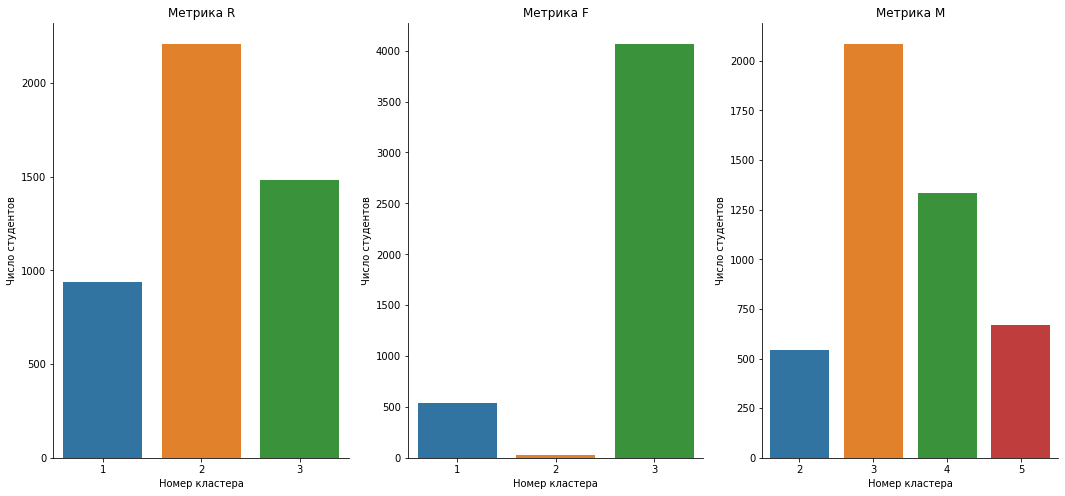

In [75]:
fig, ax = plt.subplots(1,3, figsize=(18, 8))
sns.countplot(x='R', data=rfm_data.sort_values('R'), ax=ax[0]).set_title('Метрика R')
sns.countplot(x='F', data=rfm_data.sort_values('F'), ax=ax[1]).set_title('Метрика F')
sns.countplot(x='M', data=rfm_data.sort_values('M'), ax=ax[2]).set_title('Метрика M')
ax[0].set(xlabel='Номер кластера', ylabel='Число студентов')
ax[1].set(xlabel='Номер кластера', ylabel='Число студентов')
ax[2].set(xlabel='Номер кластера', ylabel='Число студентов')
sns.despine()
plt.show()

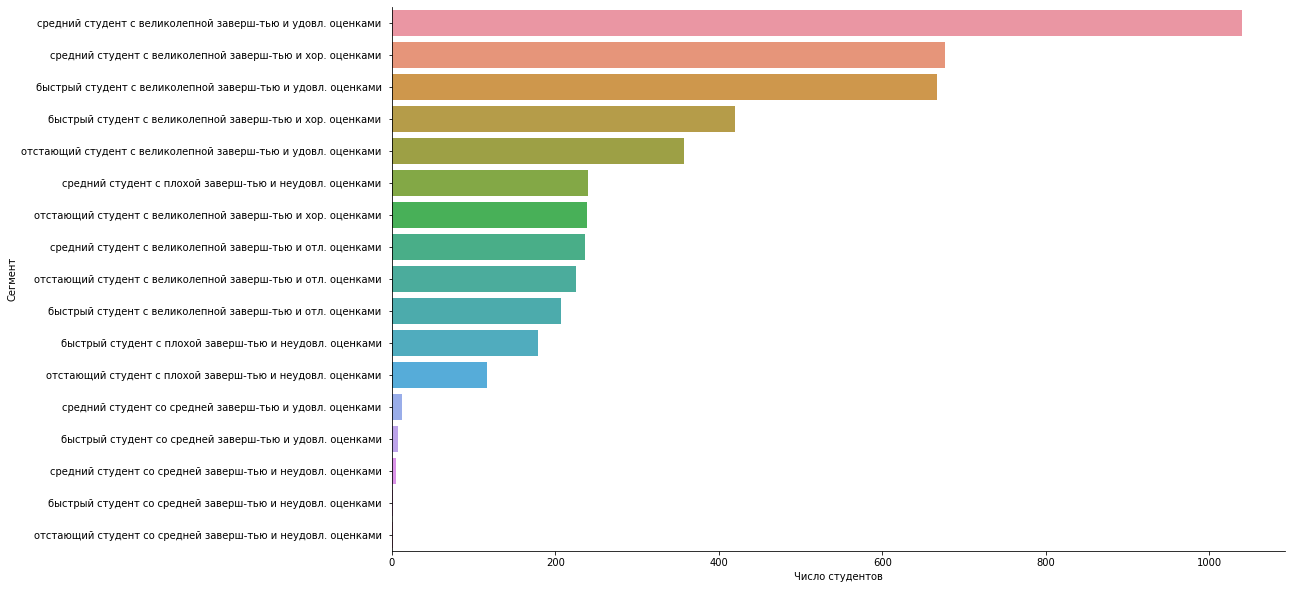

In [76]:
plt.figure(figsize=(16, 10))
sns.countplot(y='segments', data=rfm_data, order=rfm_data['segments'].value_counts().index).set(xlabel='Число студентов', ylabel='Сегмент')
sns.despine()
plt.show()

#### Выводы RFM анализа

Так как нумерация в рамках метрики происходила по принципу больше - лучше, то можем подвести следующие итоги:
* с R метрикой никаких неожиданностей, так как мы сами определили лимит каждого кластера, но можно заметить, что на пограничных значениях больше число студентов, которые сдают экзамены раньше
* F метрика не дает особой информативности, так как максимальное число экзаменов на одного студента равняется 2 (как и число попыток). Соответственно, почти все студенты имеют 100% завершаемость, некоторая часть в принципе успешно не сдает ни одного экзамена и лишь единицы (28 из 4633 студентов) имеют пересдачу, причем успешную
* метрика M показывает успеваемость студентов, где отмечается преобладание удовлетворительной оценки. А тройки и четверки в сумме получают практически 75% студентов
